Utilizando as pluviometrias das capitais dos estados. Peguei os valores de http://clima1.cptec.inpe.br/estacoes/pt#, para o mês de maio de 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
mapa_pluviometria = {
'AC': {'value': 101.8, 'border': ['AM']},
'AL': {'value': 340.7, 'border': ['BA', 'SE', 'PE']},
'AP': {'value': 351.5, 'border': ['AM', 'PA']},
'AM': {'value': 256.3, 'border': ['AC', 'RR', 'RO', 'MT', 'PA']},
'BA': {'value': 324.8, 'border': ['ES', 'MG', 'GO', 'TO', 'PI', 'PE', 'AL', 'SE']},
'CE': {'value': 226.1, 'border': ['PI', 'RN', 'PB', 'PE']},
'DF': {'value': 39.3, 'border': ['GO', 'MG']},
'ES': {'value': -1, 'border': ['RJ', 'BA', 'MG']},
'GO': {'value': 36.4, 'border': ['TO', 'BA', 'MG', 'MS', 'MT', 'DF']},
'MA': {'value': 319.8, 'border': ['PA', 'TO', 'PI']},
'MT': {'value': 53.9, 'border': ['RO', 'AM', 'PA', 'TO', 'GO', 'MS']},
'MS': {'value': 111.4, 'border': ['MT', 'GO', 'SP', 'PR']},
'MG': {'value': 39.3, 'border': ['GO', 'MS', 'SP', 'ES', 'RJ', 'BA']},
'PA': {'value': 304.4, 'border': ['AP', 'RR', 'AM', 'MT', 'TO', 'MA']},
'PB': {'value': 307.9, 'border': ['RN', 'CE', 'PE']},
'PR': {'value': 99.2, 'border': ['SP', 'MS', 'SC']},
'PE': {'value': 328.9, 'border': ['BA', 'CE', 'PI', 'PB', 'AL']},
'PI': {'value': 109.5, 'border': ['MA', 'BA', 'PE', 'TO', 'CE']},
'RJ': {'value': 85.6, 'border': ['SP', 'MG', 'ES']},
'RN': {'value': 172.2, 'border': ['CE', 'PB']},
'RS': {'value': 94.6, 'border': ['SC']},
'RO': {'value': 118, 'border': ['AM', 'AC', 'MT']},
'RR': {'value': -1, 'border': ['PA', 'AM']},
'SC': {'value': 96.9, 'border': ['PR', 'RS']},
'SP': {'value': 73.6, 'border': ['MS', 'PR', 'RJ', 'MG']},
'SE': {'value': 272.7, 'border': ['BA', 'AL']},
'TO': {'value': 37.5, 'border': ['BA', 'GO', 'MT', 'PA', 'MA', 'PI']}
}

ES e RR não têm valores no site. Vou imputar a média das pluviometrias dos estados brasileiros. 

In [3]:
soma = 0.0
for estado in mapa_pluviometria.keys():
    if mapa_pluviometria[estado]['value'] > 0:
        print(estado)
        print(mapa_pluviometria[estado]['value'])
        soma = soma + mapa_pluviometria[estado]['value']
media = soma / len(mapa_pluviometria)

AC
101.8
AL
340.7
AP
351.5
AM
256.3
BA
324.8
CE
226.1
DF
39.3
GO
36.4
MA
319.8
MT
53.9
MS
111.4
MG
27.8
PA
304.4
PB
307.9
PR
99.2
PE
328.9
PI
109.5
RJ
85.6
RN
172.2
RS
94.6
RO
118
SC
96.9
SP
73.6
SE
272.7
TO
37.5


In [4]:
media

158.91851851851854

In [5]:
mapa_pluviometria['ES']['value'] = media
mapa_pluviometria['RR']['value'] = media

Agora, calculo os _lags_ para cada estado.

In [6]:
tabela_lags = pd.DataFrame(columns=['estado', 'pluviometria', 'pluviometria_lag'])

for i, estado in enumerate(mapa_pluviometria.keys()):
    val = mapa_pluviometria[estado]['value']
    border = mapa_pluviometria[estado]['border']
    soma = 0.0
    for estado_borda in border:
        val_border = mapa_pluviometria[estado_borda]['value']
        soma = soma + val_border
    media = soma / len(border)
    tabela_lags.loc[i, 'estado'] = estado
    tabela_lags.loc[i, 'pluviometria'] = val
    tabela_lags.loc[i, 'pluviometria_lag'] = media

tabela_lags

,estado,pluviometria,pluviometria_lag
0,AC,101.8,256.3
1,AL,340.7,308.8
2,AP,351.5,280.35
3,AM,256.3,147.404
4,BA,324.8,164.052
5,CE,226.1,229.625
6,DF,39.3,32.1
7,ES,158.919,146.067
8,GO,36.4,99.1167
9,MA,319.8,150.467


Fazemos o fit de uma reta, minimizando o RSS (basta utilizar o `LinearRegression` da biblioteca _sklearn_).

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(tabela_lags[['pluviometria']], tabela_lags[['pluviometria_lag']])

LinearRegression()

In [8]:
model.coef_

array([[0.4531569]])

In [9]:
model.intercept_

array([99.25133396])

In [10]:
# Função encontrada em https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# para plotar uma reta, dada o intercepto e o coeficiente
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

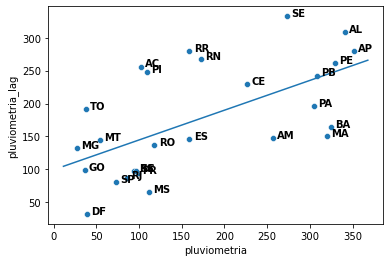

In [11]:
graphic = sns.scatterplot(data=tabela_lags, x="pluviometria", y="pluviometria_lag")
for line in range(0,tabela_lags.shape[0]):
     graphic.text(tabela_lags['pluviometria'][line]+5, tabela_lags['pluviometria_lag'][line], tabela_lags['estado'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
abline(model.coef_[0], model.intercept_[0])

`Moran's I = 0.4531569`

Ou seja, existe autocorrelação espacial na variável "pluviometria".

Melhorias possiveis:

- Utilizar a pluviometria de todos os municípios brasileiros, não somente as capitais
- Ponderar o cálculo do _lag_ pelas distâncias entre os centroides. Na prática, o calculo do Moran's I é feito com essa ponderação.